# dq

> calculate abc to dq0 transformations.

In [ ]:
#| default_exp dq

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
import sympy
from IPython import display

### Convention, equations for PMSM

#### emf
$e_a = E \sin(\theta)$      
$e_b = E \sin(\theta - 2 \pi/3)$        
$e_c = E \sin(\theta + 2 \pi/3)$

#### self-inductance
$Laa = L_0 + L_2 \cos(2 \theta)$        
$Lbb = L_0 + L_2 \cos(2 \theta + 2 \pi/3)$      
$Laa = L_0 + L_2 \cos(2 \theta - 2 \pi/3)$      

#### mutual-inductance
$Lab = M_0 + M_2 \cos(2\theta - 2\pi/3)$        
$Lbc = M_0 + M_2 \cos(2\theta)$     
$Lca = M_0 + M_2 \cos(2\theta + 2\pi/3)$     

$L_{abc} = \begin{bmatrix}
Laa & Lab & Lca \\
Lab & Lbb & Lbc \\
Lca & Lbc & Lca
\end{bmatrix}$

#### transformation matrix
$K = \dfrac{2}{3}\begin{bmatrix}
\cos(\theta) & \cos(\theta-2\pi/3) & \cos(\theta+2\pi/3)\\
\sin(\theta) & \sin(\theta-2\pi/3) & \sin(\theta+2\pi/3)\\
0.5 & 0.5 & 0.5
\end{bmatrix}$


#### inverse transformation matrix
$K^{-1} = \begin{bmatrix}
\cos(\theta) & \sin(\theta) & 1 \\
\cos(\theta-2\pi/3) & \sin(\theta-2\pi/3) & 1 \\
\cos(\theta+2\pi/3) & \sin(\theta+2\pi/3) & 1
\end{bmatrix}$

#### Ldq0 axis inductance
$L_d = (L_0 - M_0) - (\dfrac{L_2}{2} + M_2)$        
$L_q = (L_0 - M_0) + (\dfrac{L_2}{2} + M_2)$

In [ ]:
#| export
def transform(theta, x):
    k = (2/3)*np.matrix([[np.cos(theta), np.cos(theta - 2*np.pi/3), np.cos(theta + 2*np.pi/3)],
    [np.sin(theta), np.sin(theta - 2*np.pi/3), np.sin(theta + 2*np.pi/3)],
    [0.5, 0.5, 0.5]])
    print('tranformation matrix (shape:{}): \n{}\n'.format(np.shape(k), k))

    x = np.matrix(x)
    print('abc matrix (shape:{}): \n{}\n'.format(np.shape(x), x))

    try:
        #np.shape(k)[1] == np.shape(x)[0]
        dq = np.matmul(k, x)
        print('tranformed matrix: \n', dq)
        return dq

    except:
        print('incompatible input shapes')

#### forward transform example

In [ ]:
angle = 0
x = [[np.cos(angle)], [np.cos(angle-2*np.pi/3)], [np.cos(angle+2*np.pi/3)]]
x_dq = transform(angle, x)

tranformation matrix (shape:(3, 3)): 
[[ 0.66666667 -0.33333333 -0.33333333]
 [ 0.         -0.57735027  0.57735027]
 [ 0.33333333  0.33333333  0.33333333]]

abc matrix (shape:(3, 1)): 
[[ 1. ]
 [-0.5]
 [-0.5]]

tranformed matrix: 
 [[1.00000000e+00]
 [1.71752100e-17]
 [1.57281595e-16]]


In [ ]:
#| export
def inv_transform(theta, x):
    k1 = np.matrix(((np.cos(theta), np.sin(theta), 1),
        (np.cos(theta - 2*np.pi/3), np.sin(theta - 2*np.pi/3), 1),
        (np.cos(theta + 2*np.pi/3), np.sin(theta + 2*np.pi/3), 1)))
    print('tranformation matrix (shape:{}): \n{}\n'.format(np.shape(k1), k1))

    x = np.matrix(x)
    print('dq matrix (shape:{}): \n{}\n'.format(np.shape(x), x))

    try:
        #np.shape(k)[1] == np.shape(x)[0]
        abc = np.matmul(x, k1)
        print('tranformed matrix: \n', abc)
        return abc

    except:
        print('incompatible input shapes')

#### inverse tranform example

In [ ]:
angle = 0
x = [1, 0, 0]
inv_transform(angle, x)

tranformation matrix (shape:(3, 3)): 
[[ 1.         0.         1.       ]
 [-0.5       -0.8660254  1.       ]
 [-0.5        0.8660254  1.       ]]

dq matrix (shape:(1, 3)): 
[[1 0 0]]

tranformed matrix: 
 [[1. 0. 1.]]


matrix([[1., 0., 1.]])

#### $L_{dq0}$ measurements

In [ ]:
L0, L2, M0, M2, ta = sympy.symbols('L0, L2, M0, M2, ta')
laa = L0 + L2*sympy.cos(2*ta)
lbb = L0 + L2*sympy.cos(2*ta + 2*sympy.pi/3)
lcc = L0 + L2*sympy.cos(2*ta - 2*sympy.pi/3)
lab = M0 + M2*sympy.cos(2*ta -2*sympy.pi/3)
lbc = M0 + M2*sympy.cos(2*ta)
lca = M0 + M2*sympy.cos(2*ta +2*sympy.pi/3)

$L_d, L_q$ can be measured in practice by locking the direct axis of rotor to one of the phases. Example:

1. short the terminals B-C
2. pass dc current through phase-A and shorted terminals of phase-B/C
3. pass sufficient current to ensure that rotor moves and locks to phase A
4. After the rotor locks itself to phase-A. Remove DC current and measure inductance $L_m$ across phase-A and phase-B

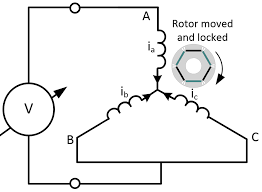

In [ ]:
#|echo: false
display.Image("../data_for_docs/Ld_Lq.png")

The measured inductance is given as

In [ ]:
Lm = laa + lbb/2 -lab*3/2 - lca/2 + lbc/2
Lm

3*L0/2 - L2*sin(2*ta + pi/6)/2 + L2*cos(2*ta) - 3*M0/2 + M2*sin(2*ta + pi/6)/2 + M2*cos(2*ta)/2 + 3*M2*cos(2*ta + pi/3)/2

According the expressions for inductance. rotor position $ta$ is 90 degrees when the direct axis is aligned to Phase A. Substituting the same, expression of measured inductance is calculated as 3/2 times the Ld value.

In [ ]:
Lm.evalf(subs={ta: np.pi/2})

1.5*L0 - 0.75*L2 - 1.5*M0 - 1.5*M2

Above expression is $\dfrac{3}{2}L_d$, providing experimental values for $L_d$. In this rotor position, inductance ($L_m$) measured between phase B and phase C is 

In [ ]:
lm = lbb + lcc - 2*lbc
lm

2*L0 - L2*sin(2*ta + pi/6) - L2*cos(2*ta + pi/3) - 2*M0 - 2*M2*cos(2*ta)

Substituting the same rotor position angle for $ta$ shows that the measured values is twice the Lq inductance

In [ ]:
lm.evalf(subs={ta: np.pi/2})

2.0*L0 + 1.0*L2 - 2.0*M0 + 2.0*M2

Above expression is $2L_q$, providing experimental value for $L_q$

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()